In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
city_data = pd.read_csv("Resources/city_data.csv")
city_data.head()



,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_data = pd.read_csv("Resources/ride_data.csv")
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
merge_data = pd.merge(city_data,ride_data, how='outer', on="city")
merge_data.info


<bound method DataFrame.info of                  city  driver_count   type                 date   fare  \
0         Richardfort            38  Urban  2018-02-24 08:40:38  13.93   
1         Richardfort            38  Urban  2018-02-13 12:46:07  14.00   
2         Richardfort            38  Urban  2018-02-16 13:52:19  17.92   
3         Richardfort            38  Urban  2018-02-01 20:18:28  10.26   
4         Richardfort            38  Urban  2018-04-17 02:26:37  23.00   
5         Richardfort            38  Urban  2018-04-21 03:44:04   9.54   
6         Richardfort            38  Urban  2018-02-03 00:14:26  29.04   
7         Richardfort            38  Urban  2018-02-08 15:50:12  16.55   
8         Richardfort            38  Urban  2018-04-03 15:07:34  40.77   
9         Richardfort            38  Urban  2018-02-19 14:09:20  27.11   
10        Richardfort            38  Urban  2018-04-22 03:06:56  39.74   
11        Richardfort            38  Urban  2018-01-31 14:51:01  43.92   
12    

In [5]:
urban_data = merge_data.loc[merge_data["type"] == "Urban"]#.count()
urban_data = pd.DataFrame(urban_data)

urban_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [6]:
urban_places = urban_data.groupby("city")

urban_fares_avg = urban_places['fare'].mean()
urban_fares_avg = pd.DataFrame(urban_fares_avg).reset_index()
print(urban_fares_avg)

                    city       fare
0            Amandaburgh  24.641667
1            Barajasview  25.332273
2            Carriemouth  28.314444
3        Christopherfurt  24.501852
4              Deanville  25.842632
5        East Kaylahaven  23.757931
6              Erikaland  24.906667
7            Grahamburgh  25.221200
8            Huntermouth  28.993750
9            Hurleymouth  25.891429
10              Jerryton  25.649200
11               Johnton  26.785714
12          Joneschester  22.289600
13            Justinberg  23.694333
14             Karenberg  26.340000
15             Karenside  27.453571
16       Lake Danielberg  24.844231
17    Lake Jonathanshire  23.425833
18         Lake Scottton  23.809167
19               Leahton  21.243810
20              Liumouth  26.150000
21             Loganberg  25.292500
22         Martinezhaven  22.651250
23        New Jacobville  26.765556
24   New Kimberlyborough  22.589000
25           New Paulton  27.820000
26         New Paulville  21

In [7]:
# * Total Number of Rides Per City
urban_rides = urban_places['ride_id'].count()
urban_rides = pd.DataFrame(urban_rides).reset_index()
print(urban_rides)

                    city  ride_id
0            Amandaburgh       18
1            Barajasview       22
2            Carriemouth       27
3        Christopherfurt       27
4              Deanville       19
5        East Kaylahaven       29
6              Erikaland       12
7            Grahamburgh       25
8            Huntermouth       24
9            Hurleymouth       28
10              Jerryton       25
11               Johnton       21
12          Joneschester       25
13            Justinberg       30
14             Karenberg       17
15             Karenside       28
16       Lake Danielberg       26
17    Lake Jonathanshire       24
18         Lake Scottton       24
19               Leahton       21
20              Liumouth       33
21             Loganberg       28
22         Martinezhaven       24
23        New Jacobville       18
24   New Kimberlyborough       30
25           New Paulton       19
26         New Paulville       22
27         North Barbara       22
28         Nor

In [8]:
# Total Number of Drivers

urban_drivers = urban_places['driver_count'].max()
urban_drivers = pd.DataFrame(urban_drivers).reset_index()
urban_drivers['driver_count'] = pd.to_numeric(urban_drivers['driver_count'])
print(urban_drivers)

                    city  driver_count
0            Amandaburgh            12
1            Barajasview            26
2            Carriemouth            52
3        Christopherfurt            41
4              Deanville            49
5        East Kaylahaven            65
6              Erikaland            37
7            Grahamburgh            61
8            Huntermouth            37
9            Hurleymouth            36
10              Jerryton            64
11               Johnton            27
12          Joneschester            39
13            Justinberg            39
14             Karenberg            22
15             Karenside             5
16       Lake Danielberg            19
17    Lake Jonathanshire             5
18         Lake Scottton            58
19               Leahton            17
20              Liumouth            69
21             Loganberg            23
22         Martinezhaven            25
23        New Jacobville            50
24   New Kimberlyborough 

In [9]:
urban_merge = pd.merge(urban_fares_avg, urban_rides, on='city', how='outer')

urban_merge2 = pd.merge(urban_merge, urban_drivers, on='city', how='outer')
urban_merge2.head()

,city,fare,ride_id,driver_count
0,Amandaburgh,24.641667,18,12
1,Barajasview,25.332273,22,26
2,Carriemouth,28.314444,27,52
3,Christopherfurt,24.501852,27,41
4,Deanville,25.842632,19,49


In [10]:
# SUBURBAN RIDE INFO

suburban_data = merge_data.loc[merge_data["type"] == "Suburban"]#.count()
suburban_data = pd.DataFrame(suburban_data)

suburban_places = suburban_data.groupby("city")

suburban_fares_avg = suburban_places['fare'].mean()
suburban_fares_avg = pd.DataFrame(suburban_fares_avg).reset_index()

# * Total Number of Rides Per City
suburban_rides = suburban_places['ride_id'].count()
suburban_rides = pd.DataFrame(suburban_rides).reset_index()

# Total Number of Drivers

suburban_drivers = suburban_places['driver_count'].max()
suburban_drivers = pd.DataFrame(suburban_drivers).reset_index()
suburban_drivers['driver_count'] = pd.to_numeric(suburban_drivers['driver_count'])

suburban_merge = pd.merge(suburban_fares_avg, suburban_rides, on='city', how='outer')

suburban_merge2 = pd.merge(suburban_merge, suburban_drivers, on='city', how='outer')
# RURAL RIDE INFO

rural_data = merge_data.loc[merge_data["type"] == "Rural"]#.count()
rural_data = pd.DataFrame(rural_data)

rural_places = rural_data.groupby("city")

rural_fares_avg = rural_places['fare'].mean()
rural_fares_avg = pd.DataFrame(rural_fares_avg).reset_index()

# * Total Number of Rides Per City
rural_rides = rural_places['ride_id'].count()
rural_rides = pd.DataFrame(rural_rides).reset_index()

# Total Number of Drivers

rural_drivers = rural_places['driver_count'].max()
rural_drivers = pd.DataFrame(rural_drivers).reset_index()
rural_drivers['driver_count'] = pd.to_numeric(rural_drivers['driver_count'])

rural_merge = pd.merge(rural_fares_avg, rural_rides, on='city', how='outer')

rural_merge2 = pd.merge(rural_merge, rural_drivers, on='city', how='outer')


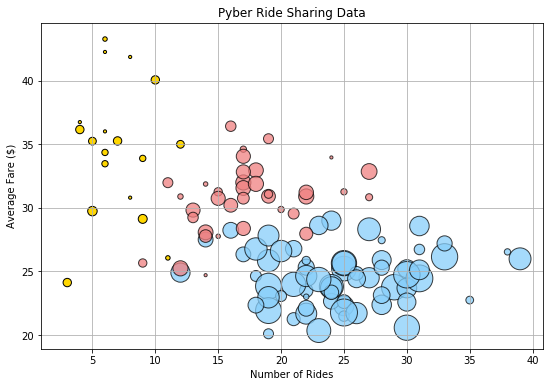

In [12]:
s=(urban_merge2['driver_count'])
ax = urban_merge2.plot(kind="scatter", x="ride_id", y="fare", s=s*10, Facecolors="LightSkyBlue", Edgecolor="Black", alpha=".75", grid=True, figsize=(9,6))

s=(suburban_merge2['driver_count'])
suburban_merge2.plot(kind="scatter", x="ride_id", y="fare", s=s*10, Facecolors="Lightcoral", Edgecolor="Black", alpha=".75", ax=ax)

s=(rural_merge2['driver_count'])
rural_merge2.plot(kind="scatter", x="ride_id", y="fare", s=s*10, Facecolors="gold", Edgecolor="Black", ax=ax)

#plt.xlim = ([0,100])
#plt.ylim = ([0,100])
plt.title('Pyber Ride Sharing Data')
plt.xlabel('Number of Rides')
plt.ylabel('Average Fare ($)')
plt.grid(True)

#plt.legend()
plt.show()

#grid=True, figsize=(10, 5)

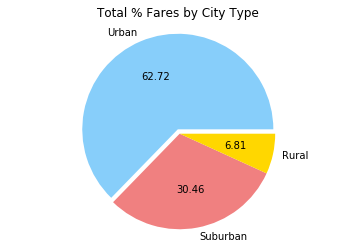

In [13]:
# Making the Py Charts

## % Total Fares by City Type

urban_fares_total = urban_data['fare'].sum()
suburban_fares_total = suburban_data['fare'].sum()
rural_fares_total = rural_data['fare'].sum()

city_type_fare = ["Urban", "Suburban", "Rural"]
city_rides_fares = [urban_fares_total, suburban_fares_total, rural_fares_total]

colors = ["lightskyblue", "lightcoral", "gold"]
explode = [0.05, 0, 0]

plt.pie(city_rides_fares, explode=explode, labels=city_type_fare, colors=colors, autopct='%.2f')


plt.axis("equal") 

plt.title("Total % Fares by City Type")
plt.show()


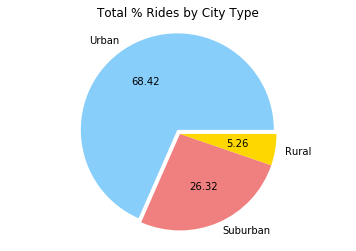

In [13]:
## % Total Rides by City Type

urban_rides_total = urban_data['ride_id'].count()
suburban_rides_total = suburban_data['ride_id'].count()
rural_rides_total = rural_data['ride_id'].count()

city_type_rides = ["Urban", "Suburban", "Rural"]
city_rides_rides = [urban_rides_total, suburban_rides_total, rural_rides_total]

colors = ["lightskyblue", "lightcoral", "gold"]
explode = [0.05, 0, 0]

plt.pie(city_rides_rides, explode=explode, labels=city_type_fare, colors=colors, autopct='%.2f')

plt.axis("equal")
plt.title("Total % Rides by City Type")
plt.show()

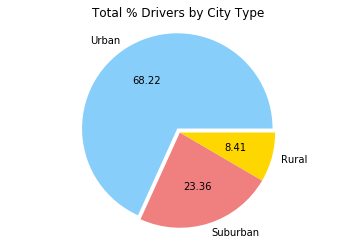

In [14]:
## % Total Drivers by City Type

urban_drivers_total = urban_data['driver_count'].max()
suburban_drivers_total = suburban_data['driver_count'].max()
rural_drivers_total = rural_data['driver_count'].max()

city_type_drivers = ["Urban", "Suburban", "Rural"]
city_rides_drivers = [urban_drivers_total, suburban_drivers_total, rural_drivers_total]

colors = ["lightskyblue", "lightcoral", "gold"]
explode = [0.05, 0, 0]

plt.pie(city_rides_drivers, explode=explode, labels=city_type_fare, colors=colors, autopct='%.2f')

plt.axis("equal")
plt.title("Total % Drivers by City Type")
plt.show()